# Tramway

## Import Libaries 

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.font_manager import FontProperties
%matplotlib inline

import arabic_reshaper
from bidi.algorithm import get_display

## Data

### Create DataFrames 

In [4]:
address_Tram=r"E:\university\Master\proposal\Final\Tramway.xlsx"
address_Metro=r"E:\university\Master\proposal\Final\metro.xlsx"


df_DataBase=pd.read_excel(address_Tram,sheet_name="DataBase")
df_Current=pd.read_excel(address_Tram,sheet_name="Current")
df_metro=pd.read_excel(address_Metro,sheet_name="List")
df_Develop=pd.read_excel(address_Tram,sheet_name="Developing")

### Prepare df_Sure

In [6]:
df_Sure=df_DataBase[df_DataBase["code"]=="Sure"]
df_Sure["Data from Final"] = df_Sure[["Data From 1", "Data From 2"]].max(axis=1)
df_Sure["Data to Final"] = df_Sure[["Data to 1", "Data to 2"]].max(axis=1)


<ipython-input-6-0d6b7df9e566>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Sure["Data from Final"] = df_Sure[["Data From 1", "Data From 2"]].max(axis=1)
<ipython-input-6-0d6b7df9e566>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Sure["Data to Final"] = df_Sure[["Data to 1", "Data to 2"]].max(axis=1)


#### Prepare df_Sure_elec

In [7]:

system_types=list(df_Sure["Traction type"].unique())
elec={}
for system in system_types:
    elec[system]=str(system).lower().find("electric")
    
df_Sure_elec=df_Sure[df_Sure["Traction type"].map(elec)!=-1]


### Prepare df_Current

In [8]:
df_Current["After 2000"]=(df_Current["Year opened"]>=2000)
df_Current["After 2000"]=df_Current["After 2000"].apply(lambda x:"After 2000" if x == True else "Before 2000")

df_Current=df_Current[df_Current["Calculate"]!="Don't Calculate"]

df_Current=df_Current[df_Current["Operation code "]<5]

### Prepare df of cities

In [30]:
df_Current["Population"] = df_Current["Population"].replace({',': '', '\xa0': ''}, regex=True).astype(float)

#city_Tramway

tram_cols=["City","Country", "Population","Continent","Developing","Year opened","Start Operation","lan","lat"]
city_Tramway = df_Current.groupby(tram_cols)["length (km)"].sum().reset_index()
city_Tramway.rename(columns={"length (km)":"length(km)_Tramway"},inplace=True)
city_Tramway["length_per_capita_Tramway"] = city_Tramway["length(km)_Tramway"] / city_Tramway["Population"] * 100000

#df_metro
metro_cols=["City","Country region", "Population","Continent","Service opened","lan","lat"]
df_metro["Population"] = df_metro["Population"].replace({',': '', '\xa0': ''}, regex=True).astype(float)
city_metro = df_metro.groupby(metro_cols)["length(km)"].sum().reset_index()
city_metro.rename(columns={"length(km)":"length(km)_Metro"},inplace=True)
city_metro["length_per_capita_Metro"] = city_metro["length(km)_Metro"] / city_metro["Population"] * 100000

#city
df_city=city_Tramway.merge(city_metro, how="outer",on="City")
df_city["length_per_capita"]=df_city["length_per_capita_Tramway"].fillna(0)+df_city["length_per_capita_Metro"].fillna(0)
df_city["length"]=df_city["length(km)_Tramway"].fillna(0)+df_city["length(km)_Metro"].fillna(0)

# Convert "lan_x" and "lan_y" columns to numeric data types
df_city["lan_x"] = pd.to_numeric(df_city["lan_x"], errors="coerce")
df_city["lan_y"] = pd.to_numeric(df_city["lan_y"], errors="coerce")
df_city["lan"]=df_city["lan_x"].fillna(0)+df_city["lan_y"].fillna(0)
df_city["lat"]=df_city["lat_x"].fillna(0)+df_city["lat_y"].fillna(0)


df_city["Population"]=df_city["Population_x"].fillna(0)+df_city["Population_y"].fillna(0)
df_city["Continent"]=df_city["Continent_x"].fillna("")+df_city["Continent_y"].fillna("")
df_city["Country"]=df_city["Country"].fillna("")+df_city["Country region"].fillna("")

city_to_drop=["lan_y","lan_x","lat_y","lat_x","Population_x","Population_y","Continent_x","Continent_y","Country region"]
df_city.drop(columns=city_to_drop,inplace=True)
df_city

,City,Country,Developing,Year opened,Start Operation,length(km)_Tramway,length_per_capita_Tramway,Service opened,length(km)_Metro,length_per_capita_Metro,length_per_capita,length,lan,lat,Population,Continent
0,Aarhus,Denmark,Developed,2017.0,1904,110.0,30.425066,NaN,NaN,NaN,30.425066,110.000,10.2107,56.1572,361544.0,Europe
1,Achinsk,Russia,Developed,1967.0,1967,14.5,13.283862,NaN,NaN,NaN,13.283862,14.500,90.5039,56.2817,109155.0,Europe
2,Addis Ababa,Ethiopia,Developing,2015.0,2015,31.6,1.153474,NaN,NaN,NaN,1.153474,31.600,38.7400,9.0300,2739551.0,Africa
3,Adelaide,Australia,Developed,1929.0,1909,15.0,1.057489,NaN,NaN,NaN,1.057489,15.000,138.6000,-34.9275,1418455.0,Oceania
4,Al Rayyan,Qatar,Developing,2019.0,2019,2.4,0.526751,NaN,NaN,NaN,0.526751,2.400,51.4000,25.2500,455623.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Yerevan,Armenia,NaN,NaN,NaN,NaN,NaN,1981.0,12.100,1.141361,1.141361,12.100,44.5144,40.1814,1060138.0,Asia
598,Yokohama,Japan,NaN,NaN,NaN,NaN,NaN,1972.0,53.400,1.416598,1.416598,53.400,139.6381,35.4442,3769595.0,Asia
599,Yokohama,Japan,NaN,NaN,NaN,NaN,NaN,2004.0,4.100,0.108765,0.108765,4.100,139.6381,35.4442,3769595.0,Asia
600,Zhengzhou,China,NaN,NaN,NaN,NaN,NaN,2013.0,260.600,2.539796,2.539796,260.600,113.6605,34.7492,10260667.0,Asia


In [14]:
address_city=r"E:\university\Master\proposal\Final\city.xlsx"
city.to_excel(address_city,)

In [ ]:
country_8=["China","Japan","Germany","France","England","USA","Russia","Canada"]
filtered_df = df_Sure_elec[df_Sure_elec['Country'].isin(country_8)]
filtered_df[filtered_df.Country=="USA"]

In [ ]:
# Transform the data
data_to_append = []

# Iterate over rows in filtered_df
for _, row in filtered_df.iterrows():
    if pd.notnull(row['Data From 1']) and pd.notnull(row['Data to 1']) and pd.notnull(row['Data From 2']) and pd.notnull(row['Data to 2']):
        data_to_append.append({'Country': row['Country'], 'Decade': int(row['Data From 1']) // 10 * 10, 'Count': 1})
        data_to_append.append({'Country': row['Country'], 'Decade': int(row['Data From 2']) // 10 * 10, 'Count': 1})
    elif pd.notnull(row['Data From 1']) and pd.notnull(row['Data to 1']):
        data_to_append.append({'Country': row['Country'], 'Decade': int(row['Data From 1']) // 10 * 10, 'Count': 1})

# Filter out entries with zero counts
data_to_append = [entry for entry in data_to_append if entry['Count'] > 0]

        
decade_df = pd.DataFrame(data_to_append)
decade_df_sum = decade_df.groupby(['Country', 'Decade'])['Count'].sum().reset_index()
# Create a timeline chart


In [26]:
df_Current["Date to"]=2023
df_Current

data_to_append1 = []
filtered1_df = df_Country[df_Country['Country'].isin(country_8)]
# Iterate over rows in filtered_df
for _, row in filtered1_df.iterrows():
    if pd.notnull(row['Data From 1']) and pd.notnull(row['Data to 1']) and pd.notnull(row['Data From 2']) and pd.notnull(row['Data to 2']):
        data_to_append.append({'Country': row['Country'], 'Decade': int(row['Data From 1']) // 10 * 10, 'Count': 1})
        data_to_append.append({'Country': row['Country'], 'Decade': int(row['Data From 2']) // 10 * 10, 'Count': 1})
    elif pd.notnull(row['Data From 1']) and pd.notnull(row['Data to 1']):
        data_to_append.append({'Country': row['Country'], 'Decade': int(row['Data From 1']) // 10 * 10, 'Count': 1})

# Filter out entries with zero counts
data_to_append = [entry for entry in data_to_append if entry['Count'] > 0]

        
decade_df = pd.DataFrame(data_to_append)

,row,City,lat,lan,Country,Population,Year of Population,Found code,Operation code,System,...,wiki,urban rail,Calculate,note,code red,code No.,Location,x,After 2000,Date to
0,1,Algiers,36.7539,3.0589,Algeria,4510000.0,2011.0,1,1,Algiers tramway,...,link,link,NaN,NaN,Ok all,1.0,Anren,NaN,After 2000,2023
1,2,Constantine,36.3650,6.6147,Algeria,464219.0,2008.0,1,1,Constantine tramway,...,link,link,NaN,NaN,ok,2.0,Beijing,1899,After 2000,2023
2,3,Mostaganem,35.9333,0.0833,Algeria,245330.0,2014.0,2,1,Mostaganem tramway,...,link,link,NaN,NaN,not found,3.0,Beijing,1899,After 2000,2023
3,4,Oran,35.6969,-0.6331,Algeria,1570000.0,2019.0,1,1,Oran tramway,...,link,link,NaN,NaN,in note ok,4.0,Changchun,1941,After 2000,2023
4,5,Ouargla,31.9500,5.3167,Algeria,191136.0,2008.0,1,1,Ouargla tramway,...,link,link,NaN,NaN,finish,5.0,Changchun,1941,After 2000,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,463,Rio de Janeiro,-22.9111,-43.2056,Brazil,12280702.0,2020.0,3,1,Santa Teresa Tram,...,link,link,NaN,NaN,NaN,NaN,NaN,NaN,Before 2000,2023
496,464,Rio de Janeiro,-22.9111,-43.2056,Brazil,12280702.0,2020.0,2,1,Rio de Janeiro Light Rail,...,link,link,NaN,NaN,NaN,NaN,NaN,NaN,After 2000,2023
497,465,Santos,-23.9369,-46.325,Brazil,1897551.0,2020.0,2,1,Baixada Santista Light Rail,...,link,link,NaN,NaN,NaN,NaN,NaN,NaN,After 2000,2023
498,466,Medellín,6.2308,-75.5906,Colombia,3731447.0,2020.0,1,1,Ayacucho Tram,...,link,link,NaN,NaN,NaN,NaN,NaN,NaN,After 2000,2023


## Plots

In [ ]:
pallets=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges',
'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r',
'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r',
'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r',
'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 
'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm',
'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare',
'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar',
'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 
'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire',
'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 
'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow',
'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 
'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo',
'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 
'vlag', 'vlag_r', 'winter', 'winter_r']


In [ ]:
fontprops = FontProperties()
fontprops.set_family('Times New Roman')  # You can change the font family here
fontprops.set_size(12)  

### Current Plots

In [ ]:
plt.figure(figsize=(10,10),dpi=300)
sns.stripplot(data=city, x='length_per_capita', y='Continent',
              hue="Developing", jitter=True, palette="PuOr_r",
             size=10)



plt.ylabel("Continent", fontdict={'fontsize': 14,})

fontprops = FontProperties()
fontprops.set_family('serif')  # You can change the font family here
fontprops.set_size(14)  

plt.xticks(fontproperties=fontprops)
plt.yticks(fontproperties=fontprops)
plt.xlim(0)
plt.xlabel("Length per capita", fontdict={'fontsize': 14,})
title="Length per capita of Trams in Developing Countries\n in Current Trams"

plt.title(title, 
          fontdict={'fontsize': 16, 'fontweight': 'bold', 
            'color': '#008080', 'fontname': 'Times New Roman'})
plt.grid(True)
img=r"E:\university\Master\proposal\Final\\"
img_full=img+title.replace("\n","")+".tiff"
legend_font= {'family': 'vazir', 'size': 16}
plt.legend(loc='best',prop=legend_font)
plt.savefig(img_full)
plt.show()

In [ ]:
plt.figure(figsize=(10,10),dpi=300)
sns.stripplot(data=city, x='length_per_capita', y='Continent',
              hue="Continent", jitter=True, palette="vlag",
             size=10,legend=False)



plt.ylabel("Continent", fontdict={'fontsize': 14,})

fontprops = FontProperties()
fontprops.set_family('Times New Roman')  # You can change the font family here
fontprops.set_size(14)  

plt.xticks(fontproperties=fontprops)
plt.yticks(fontproperties=fontprops)
plt.xlim(0)
plt.xlabel("Length per capita", fontdict={'fontsize': 14,})
title="Length per capita of Trams in Continents\n in Current Trams"

plt.title(title, 
          fontdict={'fontsize': 16, 'fontweight': 'bold', 
            'color': '#008080', 'fontname': 'Times New Roman'})
plt.grid(True)
img=r"E:\university\Master\proposal\Final\\"
img_full=img+title.replace("\n","")+".tiff"
plt.savefig(img_full)
plt.show()

In [ ]:
plt.figure(figsize=(16, 12),dpi=300)
sns.swarmplot(data=df_Current,x='length (km)',y='Continent', hue="Continent", legend=False,palette="tab20_r")


plt.ylabel("Continent", fontdict={'fontsize': 14,})

fontprops = FontProperties()
fontprops.set_family('serif')  # You can change the font family here
fontprops.set_size(14)  

plt.xticks(fontproperties=fontprops)
plt.yticks(fontproperties=fontprops)
plt.xlim(0)
plt.xlabel("length (km)", fontdict={'fontsize': 14,})

title="Lenght of Trams in Continents\n in Current Trams"

plt.title(title, 
          fontdict={'fontsize': 16, 'fontweight': 'bold', 
            'color': '#008080', 'fontname': 'Times New Roman'})

plt.grid(True)
img=r"E:\university\Master\proposal\Final\\"
img_full=img+title.replace("\n","")+".tiff"
plt.savefig(img_full)
plt.show()

In [ ]:
plt.figure(figsize=(16, 12),dpi=300)
sns.swarmplot(data=df_Current,x='length (km)',y='Continent', hue="Developing",palette="prism_r",)

plt.ylabel("Continent", fontdict={'fontsize': 14,})

fontprops = FontProperties()
fontprops.set_family('Times New Roman')  # You can change the font family here
fontprops.set_size(14)  

plt.xticks(fontproperties=fontprops)
plt.yticks(fontproperties=fontprops)
plt.xlim(0)
plt.xlabel("Length (km)", fontdict={'fontsize': 14,})

title="Lenght of Trams in Continents in Developed and Developing Countries\n in Current Trams"

plt.title(title, 
          fontdict={'fontsize': 16, 'fontweight': 'bold', 
            'color': '#008080', 'fontname': 'Times New Roman'})
legend_font= {'family': 'Times New Roman', 'size': 16}
plt.legend(loc='best', prop=legend_font)
plt.grid(True)
img=r"E:\university\Master\proposal\Final\\"
img_full=img+title.replace("\n","")+".tiff"
plt.savefig(img_full)
plt.show()

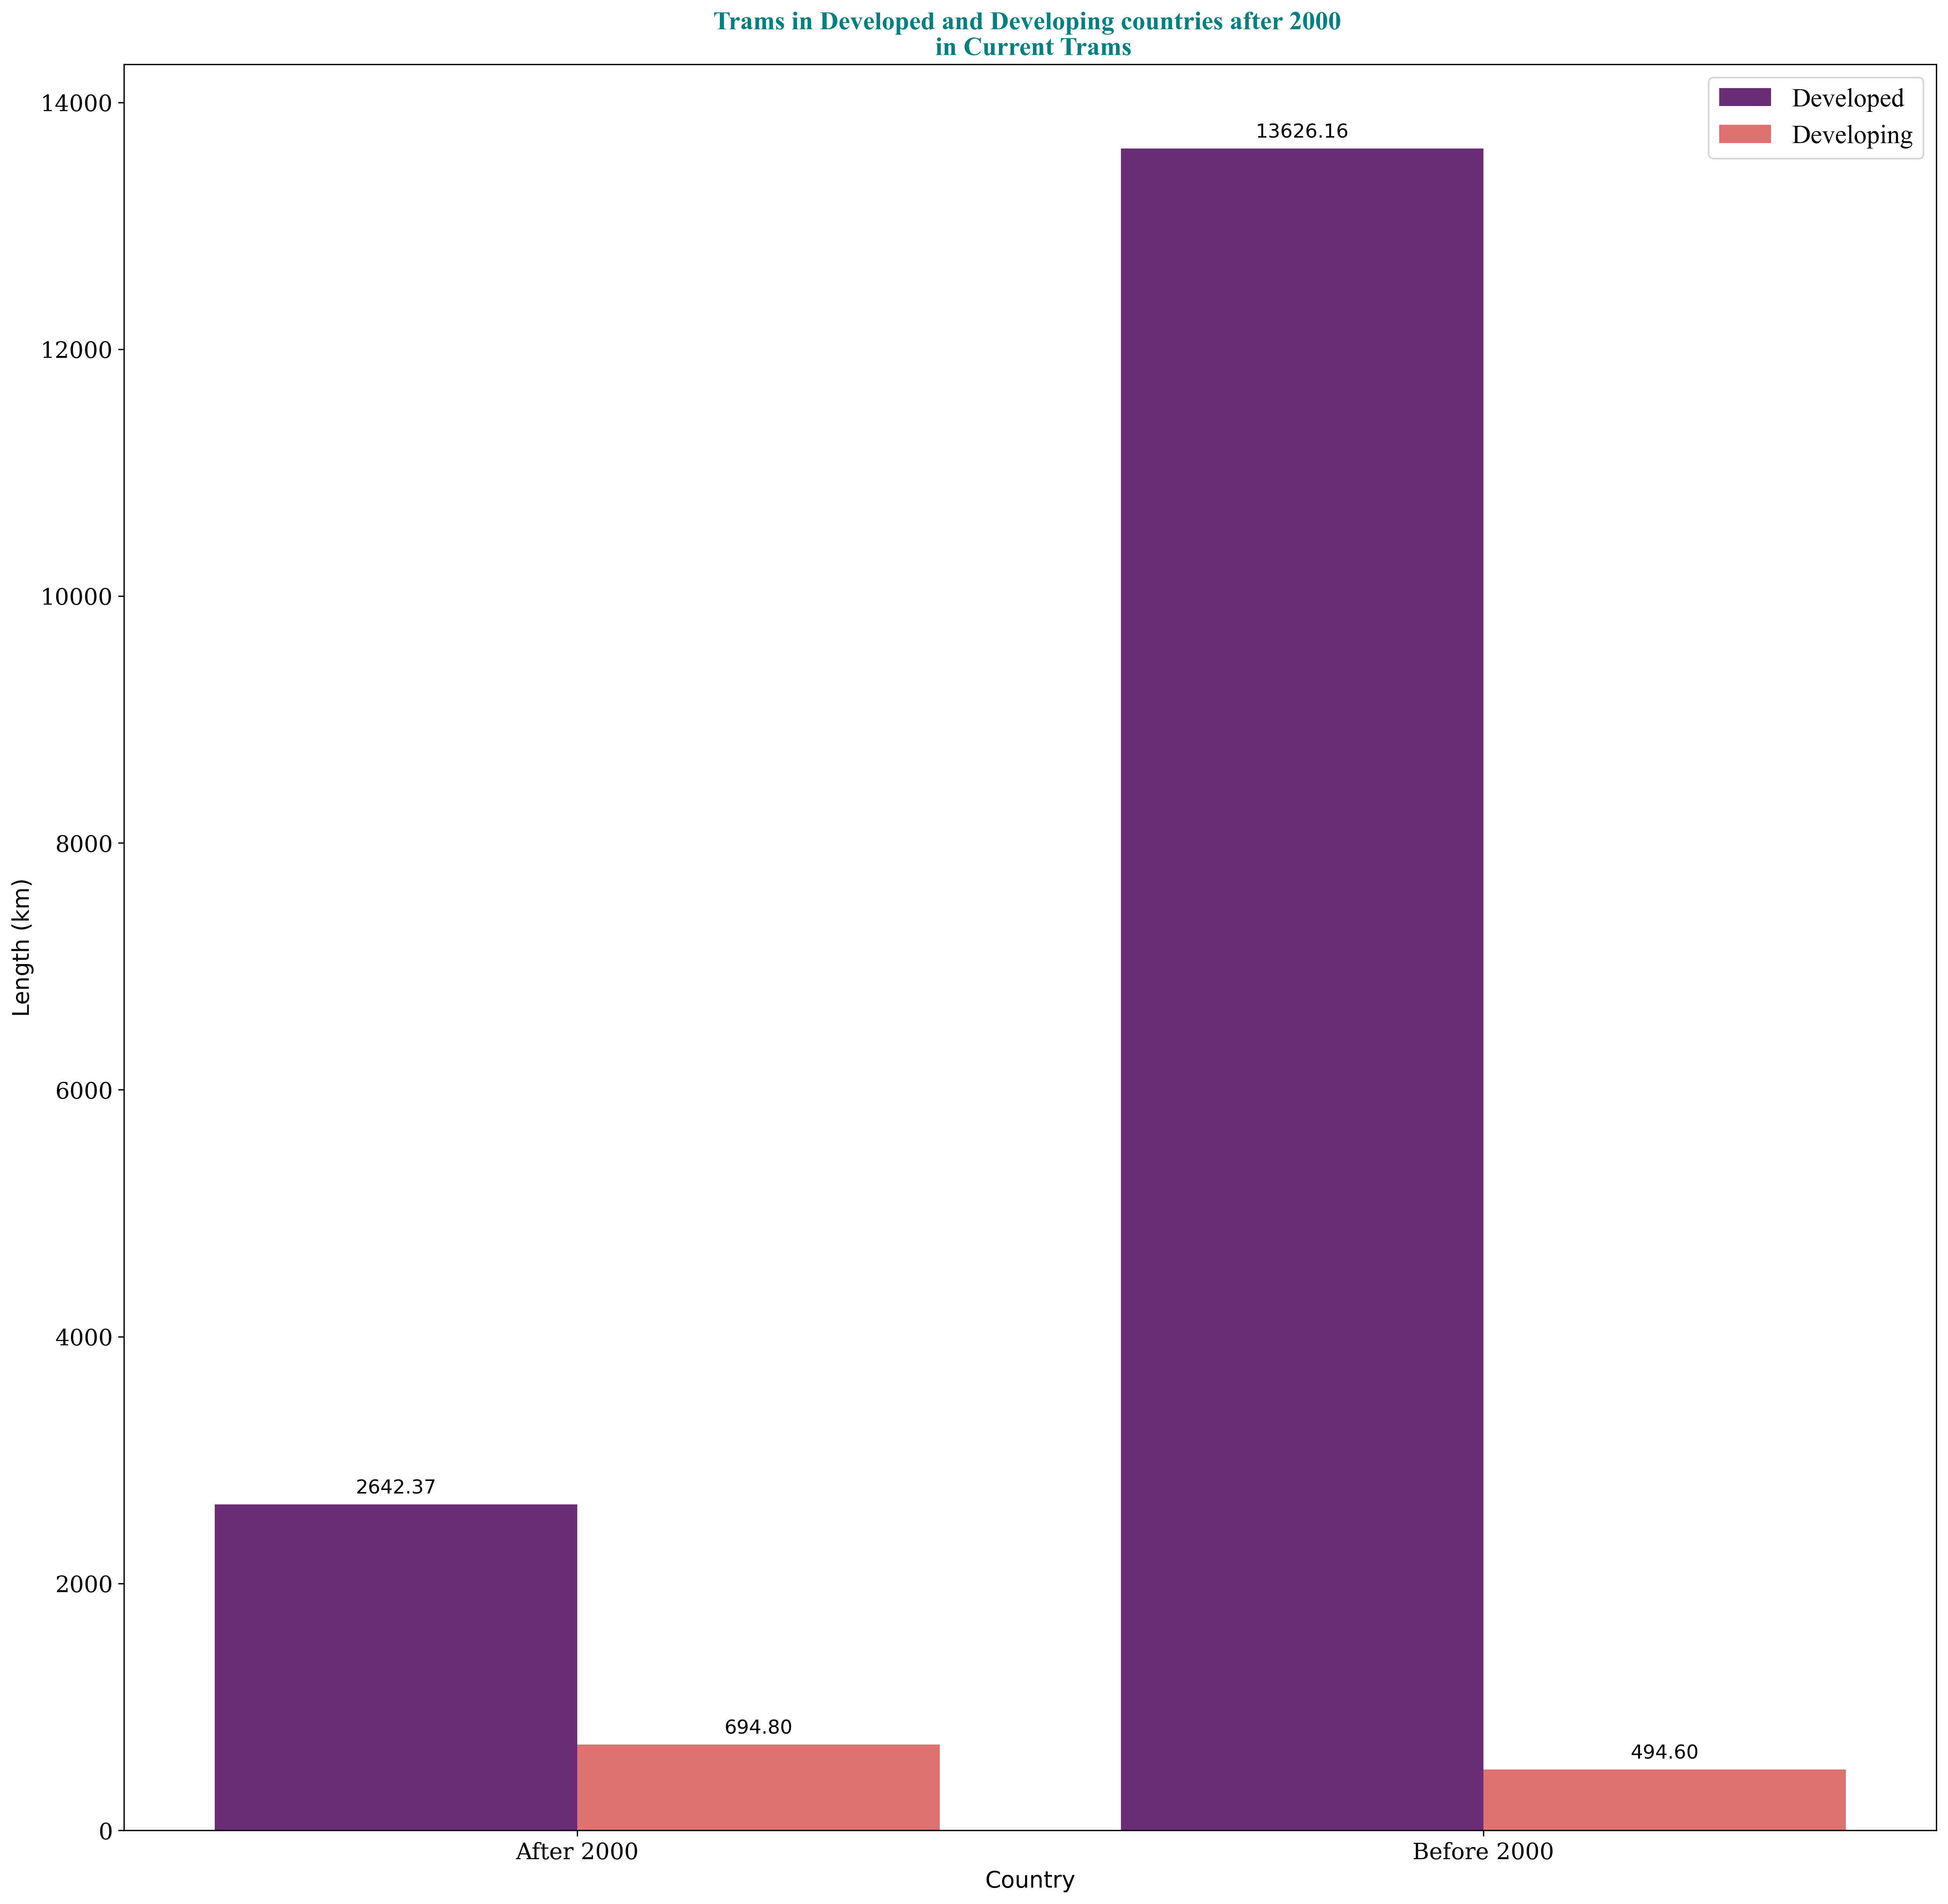

In [45]:
plt.figure(figsize=(20, 20),dpi=300)
agg_df = df_Current.groupby(['Developing', 'After 2000'])['length (km)'].sum().reset_index()
figu=sns.barplot(data=agg_df, x="After 2000", hue="Developing",palette="magma",
             y="length (km)")
#sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf")
fontprops = FontProperties()
fontprops.set_family('serif')  # You can change the font family here
fontprops.set_size(14)  
plt.ylabel("Length (km)", fontdict={'fontsize': 14,})
plt.xticks(fontproperties=fontprops)
plt.yticks(fontproperties=fontprops)
plt.xlabel("Country", fontdict={'fontsize': 14,})

for p in figu.patches:
    figu.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

title="Trams in Developed and Developing countries after 2000 \n in Current Trams"
fig1=plt.gcf()
plt.title(title, 
          fontdict={'fontsize': 16, 'fontweight': 'bold', 
            'color': '#008080', 'fontname': 'Times New Roman'})
legend_font= {'family': 'Times New Roman', 'size': 16}
plt.legend(loc='best',prop=legend_font)
img=r"E:\university\Master\proposal\Final\\"
#img_full=img+title.replace("\n","")+".tiff"
#plt.savefig(img_full)

In [ ]:

plt.figure(figsize=(20, 12), dpi=300)

# Create a histogram plot
bins = np.linspace(1860, 2040, 10)
sns.histplot(data=df_Current, x="Year opened", hue="Continent",
             palette="gnuplot_r", legend=True, bins=bins, multiple="stack", edgecolor='black')

fontprops = FontProperties()
fontprops.set_family('Times New Roman')  # You can change the font family here
fontprops.set_size(14)

plt.ylabel("Count", fontdict={'fontsize': 14})
plt.xticks(bins, ha="right", fontproperties=fontprops)  # Rotate the x-tick labels for better visibility
plt.yticks(fontproperties=fontprops)
plt.xlabel("Year opened", fontdict={'fontsize': 14})

title = "Distribution of Trams by Year and Continent \n in Current Trams"

plt.title(title,
          fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': '#008080', 'fontname': 'Times New Roman'})

legend_labels = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
legend_font = {'family': 'Times New Roman', 'size': 16}
plt.legend(legend_labels, loc='best', prop=legend_font)

img = r"E:\university\Master\proposal\Final\\"
img_full = img + title.replace("\n", "") + ".tiff"
plt.savefig(img_full)

plt.show()


In [ ]:
plt.figure(figsize=(20, 12),dpi=300)
sns.histplot(data=df_Current, x="Year opened", hue="Continent",palette="viridis",legend=True,cumulative=True)
#sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf")
fontprops = FontProperties()
fontprops.set_family('serif')  # You can change the font family here
fontprops.set_size(14)  
plt.ylabel("Count", fontdict={'fontsize': 14,})
plt.xticks(fontproperties=fontprops)
plt.yticks(fontproperties=fontprops)
plt.xlabel("Year opened", fontdict={'fontsize': 14,})
legend_labels = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
plt.title("Cumulative Distribution of Trams by Year and Continent \n in Current Trams",
          fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': '#008080'})
legend_font= {'family': 'serif', 'size': 16}
plt.legend(legend_labels,loc='best',prop=legend_font)

In [ ]:
df_Sure_elec["Data to Final"] = df_Sure_elec["Data to Final"].astype(int)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

plt.figure(figsize=(20, 12), dpi=300)

# Create a histogram plot
ax = sns.histplot(data=df_Sure_elec, x="Data to Final", legend=False, binwidth=20)

fontprops = FontProperties()
fontprops.set_family('Times New Roman')  # You can change the font family here
fontprops.set_size(14)

plt.ylabel("Count", fontdict={'fontsize': 16})
plt.xticks(fontproperties=fontprops)
plt.yticks(fontproperties=fontprops)
plt.xlabel("Year Closed", fontdict={'fontsize': 16})

title = "Distribution of Trams by Year \n in Closed Trams"
plt.title(title,
          fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': '#008080', 'fontname': 'Times New Roman'})

# Calculate the minimum and maximum year
min_year = min(df_Sure_elec['Data to Final'])
min_year = (lambda x: (x // 20) * 20)(min_year)

# Set x-ticks
xticks = range(int(min_year), int(max(df_Sure_elec["Data to Final"])) + 20, 20)
plt.xticks(ticks=xticks, labels=xticks)

# Display the value of each bar
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

img = r"E:\university\Master\proposal\Final\\"
img_full = img + title.replace("\n", "") + ".tiff"
plt.savefig(img_full)
plt.show()


In [ ]:
plt.figure(figsize=(20, 12), dpi=300)

# Create a stacked histogram plot with multiple="stack"
ax = sns.histplot(data=df_Sure_elec, x="Data to Final", legend=True, binwidth=20, hue="Continent", palette="Pastel1", multiple="stack")

font = 'Times New Roman'
fontprops = FontProperties()
fontprops.set_family(font)  # You can change the font family here
fontprops.set_size(14)

plt.ylabel("Count", fontdict={'fontsize': 16})
plt.xticks(fontproperties=fontprops)
plt.yticks(fontproperties=fontprops)
plt.xlabel("Year Closed", fontdict={'fontsize': 16})

title = "Distribution of Trams by Year and Continent \n in Closed Trams"
plt.title(title, fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': '#008080', 'fontname': font})

# Calculate the minimum and maximum year
min_year = min(df_Sure_elec['Data to Final'])
min_year = (lambda x: (x // 20) * 20)(min_year)

# Set x-ticks
xticks = range(int(min_year), int(max(df_Sure_elec["Data to Final"])) + 20, 20)
plt.xticks(ticks=xticks, labels=xticks)

# Calculate the cumulative sum of heights for each x-coordinate

# Display legend
legend_labels = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
legend_font = {'family': font, 'size': 16}
plt.legend(legend_labels, loc='upper right', prop=legend_font)

img = r"E:\university\Master\proposal\Final\\"
img_full = img + title.replace("\n", "") + ".tiff"
plt.savefig(img_full)
plt.show()

In [ ]:
plt.figure(figsize=(20, 12),dpi=300)
sns.histplot(data=df_Sure, x="Data from Final",legend=True,binwidth=20,hue="Continent"
             ,palette="Pastel1",multiple="stack",cumulative=True)
#sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf")
fontprops = FontProperties()
fontprops.set_family('serif')  # You can change the font family here
fontprops.set_size(14)  
plt.ylabel("Count", fontdict={'fontsize': 16,})
plt.xticks(fontproperties=fontprops)
plt.yticks(fontproperties=fontprops)
plt.xlabel("Year opened", fontdict={'fontsize': 16,})
#legend_labels = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
plt.title("Cumulative Distribution of Trams by Year \n in Closed Trams",
          fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': '#008080'})
#legend_font= {'family': 'serif', 'size': 16}
min_year = min(df_Sure["Data from Final"].astype(int))
min_year = (lambda x: (x // 20) * 20)(min_year)

plt.xticks(ticks=range(min_year, max(df_Sure["Data from Final"].astype(int)) + 20, 20), 
           labels=range(min_year, max(df_Sure["Data from Final"].astype(int)) + 20, 20))

legend_labels = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
plt.title("Cumulative Distribution of Trams by Year and Continent \n in Closed Trams",
          fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': '#008080'})
legend_font= {'family': 'serif', 'size': 16}
plt.legend(legend_labels,loc='best',prop=legend_font)

In [ ]:
plt.figure(figsize=(20, 12),dpi=300)
sns.histplot(data=df_Sure, x="Continent",legend=True,binwidth=20,hue="Continent")
            # ,palette="Pastel1",multiple="stack",cumulative=True)
#sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf")
fontprops = FontProperties()
fontprops.set_family('serif')  # You can change the font family here
fontprops.set_size(14)  
plt.ylabel("Count", fontdict={'fontsize': 16,})
plt.xticks(fontproperties=fontprops)
plt.yticks(fontproperties=fontprops)
plt.xlabel("Continent", fontdict={'fontsize': 16,})
#legend_labels = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
plt.title("Cumulative Distribution of Trams by Year \n in Closed Trams",
          fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': '#008080'})
#legend_font= {'family': 'serif', 'size': 16}
min_year = min(df_Sure["Data from Final"].astype(int))
min_year = (lambda x: (x // 20) * 20)(min_year)

#plt.xticks(ticks=range(min_year, max(df_Sure["Data from Final"].astype(int)) + 20, 20), 
#           labels=range(min_year, max(df_Sure["Data from Final"].astype(int)) + 20, 20))

legend_labels = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
plt.title("Distribution of Trams by Continent \n in Closed Trams",
          fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': '#008080'})
legend_font= {'family': 'serif', 'size': 16}
plt.legend(legend_labels,loc='best',prop=legend_font)

In [ ]:
plt.figure(figsize=(20, 12),dpi=300)
sns.lineplot(data=decade_df_sum, x='Decade', y='Count', hue='Country', marker='o')

font='Times New Roman'
fontprops = FontProperties()
fontprops.set_family('Times New Roman')  # You can change the font family here
fontprops.set_size(14)

plt.ylabel("Number of Systems", fontdict={'fontsize': 14})
plt.yticks(fontproperties=fontprops)
plt.xlabel("Decade", fontdict={'fontsize': 14})

title = "Timeline of Tram Closed Systems by Country"
plt.title(title, fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': '#008080', 'fontname': font})

plt.legend(title='Country', loc='upper left')

legend_font = {'family': font, 'size': 16}
plt.legend(legend_labels, loc='upper right', prop=legend_font)

img = r"E:\university\Master\proposal\Final\\"
img_full = img + title+ ".tiff"
plt.savefig(img_full)

plt.show()
decade_df_sum

## Dashborad

In [20]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc
from dash import html
from dash.dependencies import Input, Output, State
import plotly.graph_objs as go

# Load the dataset
#df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual file path

# Create the JupyterDash app
app = JupyterDash(__name__,title="first Dashboard")

# Define the app layout
app.layout = html.Div([
    html.H1("Tramway and Metro Dashboard"),
    html.Div([
        html.H2("Global Chart"),
        dcc.Graph(id='global-chart', figure={})
    ]),
    html.Div([
        html.H2("City Page"),
        html.Label("City"),
        dcc.Dropdown(
            id='city-dropdown',
            options=[{'label': city, 'value': city} for city in city['City'].unique()],
            value=None
        ),
        html.Button('Go to City Page', id='city-page-button', n_clicks=0)
    ]),
    html.Div(id='page-content')
])

# Define callback functions
@app.callback(
    Output('global-chart', 'figure'),
    Input('city-dropdown', 'value')
)
def update_global_chart(city):
#   Create the global chart
    if city is None:
        #global_data = city.groupby('Year').sum().reset_index()
        chart = go.Figure(data=[
          go.Bar(x=city['Year opened'], y=city['Tramway_Length'], name='Tramway Length'),
           go.Bar(x=city['Service opened'], y=city['Metro_Length'], name='Metro Length')
       ])
        chart.update_layout(barmode='stack')
        return chart

    return {}

@app.callback(
    Output('page-content', 'children'),
    Input('city-page-button', 'n_clicks'),
    State('city-dropdown', 'value')
)
def render_city_page(n_clicks, city):
    if n_clicks > 0 and city is not None:
        # Retrieve information for the selected city
        city_data = city[city['City'] == city]

        # Calculate the length of tram and metro in the city
        tram_length = city_data['length(km)_Tramway']
        metro_length = city_data['length(km)_Metro']

        return [
            html.H2(f"Tramway and Metro Length in {city}"),
            html.H3("Tramway Length: {}".format(tram_length)),
            html.H3("Metro Length: {}".format(metro_length))
        ]

    return []

# Run the app
if __name__ == '__main__':
    app.run_server(port=8050,debug=True,jupyter_mode='tab',)



Dash app running on http://127.0.0.1:8050/


C:\Users\Taher\AppData\Roaming\Python\Python39\site-packages\dash\dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

Dash app running on http://127.0.0.1:8050/


In [38]:
import pandas as pd
import geopandas as gpd
import plotly.graph_objs as go
import dash
from dash import html, dcc
from dash.dependencies import Input, Output

# Load the dataset
#df_city = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual file path to your dataset

# Create the Dash app
app = dash.Dash(__name__)
app.title = "City Page Dashboard"

# Define the app layout
app.layout = html.Div([
    html.H1("City Page Dashboard"),
    html.Div([
        html.Label("Continent"),
        dcc.Dropdown(
            id='continent-dropdown',
            options=[{'label': continent, 'value': continent} for continent in df_city['Continent'].unique()],
            value=None
        ),
    ]),
    html.Div([
        html.Label("Country"),
        dcc.Dropdown(
            id='country-dropdown',
            options=[],
            value=None
        ),
    ]),
    html.Div([
        html.Label("City"),
        dcc.Dropdown(
            id='city-dropdown',
            options=[],
            value=None
        ),
    ]),
    html.Div([
        html.Label("Zoom Level"),
        dcc.Slider(
            id='zoom-slider',
            min=1,
            max=10,
            step=0.5,
            value=5,
            marks={i: str(i) for i in range(1, 11)},
        ),
    ]),
    html.Div(id='city-info')
])

# Callback to update the country dropdown options based on the selected continent
@app.callback(
    Output('country-dropdown', 'options'),
    Input('continent-dropdown', 'value')
)
def update_country_dropdown(continent):
    if continent is not None:
        filtered_df = df_city[df_city['Continent'] == continent]
        countries = filtered_df['Country'].unique()
        options = [{'label': country, 'value': country} for country in countries]
        return options
    return []

# Callback to update the city dropdown options based on the selected country
@app.callback(
    Output('city-dropdown', 'options'),
    Input('country-dropdown', 'value')
)
def update_city_dropdown(country):
    if country is not None:
        filtered_df = df_city[df_city['Country'] == country]
        cities = filtered_df['City'].unique()
        options = [{'label': city, 'value': city} for city in cities]
        return options
    return []

# Callback to display the city information based on the selected city and zoom level
@app.callback(
    Output('city-info', 'children'),
    Input('city-dropdown', 'value'),
    Input('zoom-slider', 'value')
)
def display_city_info(city, zoom_level):
    if city is not None:
        city_data = df_city[df_city['City'] == city]

        # Retrieve city information
        latitude = city_data['lat'].values[0]
        longitude = city_data['lan'].values[0]
        tram_length = city_data['length(km)_Tramway'].values[0]
        metro_length = city_data['length(km)_Metro'].values[0]
        population = city_data['Population'].values[0]

        # Create a map figure
        map_figure = go.Figure(data=go.Scattergeo(
            lat=[latitude],
            lon=[longitude],
            mode='markers',
            marker=dict(
                size=10,
                color='red',
                line=dict(width=1, color='black')
            ),
            text=city
        ))

        # Set the center and zoom level
        map_figure.update_geos(
            center=dict(lon=longitude, lat=latitude),
            projection_scale=zoom_level
        )

        map_figure.update_layout(
            title=f"Geographic Location of {city}",
            geo=dict(
                resolution=50,
                showland=True,
                showlakes=True,
                landcolor='rgb(204, 204, 204)',
                countrycolor='rgb(204, 204, 204)',
                lakecolor='rgb(255, 255, 255)',
                projection_type="equirectangular",
                coastlinewidth=2,
                lataxis=dict(
                    range=[-90, 90],
                    showgrid=True,
                    dtick=30
                ),
                lonaxis=dict(
                    range=[-180, 180],
                    showgrid=True,
                    dtick=45
                )
            )
        )

        return [
            html.H2(f"City: {city}"),
            dcc.Graph(figure=map_figure),
            html.H3(f"Tram Length: {tram_length}"),
            html.H3(f"Metro Length: {metro_length}"),
            html.H3(f"Population: {population}")
        ]
    return []


if __name__ == '__main__':
    app.run_server(port=8050, debug=True,jupyter_mode='tab')

Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>

In [32]:

from jupyter_dash import JupyterDash

import plotly.graph_objs as go
import dash
from dash import html
from dash.dependencies import Input, Output
# Load the dataset
#df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual file path

# Create the JupyterDash app
app = JupyterDash(__name__, title="First Dashboard")


# Load the dataset
#df_city = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual file path to your dataset

# Create the Dash app
app = dash.Dash(__name__)
app.title = "City Page Dashboard"

# Define the app layout
app.layout = html.Div([
    html.H1("City Page Dashboard"),
    html.Div([
        html.Label("Continent"),
        dcc.Dropdown(
            id='continent-dropdown',
            options=[{'label': continent, 'value': continent} for continent in df_city['Continent'].unique()],
            value=None
        ),
    ]),
    html.Div([
        html.Label("Country"),
        dcc.Dropdown(
            id='country-dropdown',
            options=[],
            value=None
        ),
    ]),
    html.Div([
        html.Label("City"),
        dcc.Dropdown(
            id='city-dropdown',
            options=[],
            value=None
        ),
    ]),
    html.Div(id='city-info')
])

# Callback to update the country dropdown options based on the selected continent
@app.callback(
    Output('country-dropdown', 'options'),
    Input('continent-dropdown', 'value')
)
def update_country_dropdown(continent):
    if continent is not None:
        filtered_df = df_city[df_city['Continent'] == continent]
        countries = filtered_df['Country'].unique()
        options = [{'label': country, 'value': country} for country in countries]
        return options
    return []

# Callback to update the city dropdown options based on the selected country
@app.callback(
    Output('city-dropdown', 'options'),
    Input('country-dropdown', 'value')
)
def update_city_dropdown(country):
    if country is not None:
        filtered_df = df_city[df_city['Country'] == country]
        cities = filtered_df['City'].unique()
        options = [{'label': city, 'value': city} for city in cities]
        return options
    return []

# Callback to display the city information based on the selected city
@app.callback(
    Output('city-info', 'children'),
    Input('city-dropdown', 'value')
)
def display_city_info(city):
    if city is not None:
        city_data = df_city[df_city['City'] == city]

        # Retrieve city information
        latitude = city_data['lat'].values[0]
        longitude = city_data['lan'].values[0]
        tram_length = city_data['length(km)_Tramway'].values[0]
        metro_length = city_data['length(km)_Metro'].values[0]
        population = city_data['Population'].values[0]

        # Create a map figure
        map_figure = go.Figure(data=go.Scattergeo(
            lat=[latitude],
            lon=[longitude],
            mode='markers',
            marker=dict(
                size=10,
                color='red',
                line=dict(width=1, color='black')
            ),
            text=city
        ))
        map_figure.update_layout(
            title=f"Geographic Location of {city}",
            geo=dict(
                resolution=50,
                showland=True,
                showlakes=True,
                landcolor='rgb(204, 204, 204)',
                countrycolor='rgb(204, 204, 204)',
                lakecolor='rgb(255, 255, 255)',
                projection_type="equirectangular",
                coastlinewidth=2,
                lataxis=dict(
                    range=[-90, 90],
                    showgrid=True,
                    dtick=30
                ),
                lonaxis=dict(
                    range=[-180, 180],
                    showgrid=True,
                    dtick=45
                )
            )
        )

        return [
            html.H2(f"City: {city}"),
            dcc.Graph(figure=map_figure),
            html.H3(f"Tram Length: {tram_length}"),
            html.H3(f"Metro Length: {metro_length}"),
            html.H3(f"Population: {population}")
        ]
    return []


if __name__ == '__main__':
    app.run_server(port=8050, debug=True,jupyter_mode='tab')

Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>